In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import random
from mpl_toolkits.mplot3d import axes3d

1. Para la siguiente función: $f_{1}(x_{1},x_{2})=(x_{1}-0,7)^{2}+(x^{2}-0,5)^{2}$con $x_{1},x_{2}\in[-4,4]$. Realice lo siguiente:

>a) (10 puntos) Según tales gráficas, grafique las funciones usando la función meshgrid, y distinga si las funciones son convexas o no, y los puntos mínimos y regiones o puntos silla.

<Figure size 432x432 with 0 Axes>

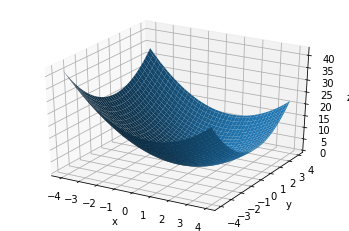

In [2]:
def plot3d():
  
  #Plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  
  #labels
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
    
  return ax

def plot_surface(f):
  x = np.arange(-4,4,0.1)
  y = np.arange(-4,4,0.1)
  X,Y = np.meshgrid(x,y)
  Z = f(X,Y)

  fig = plt.figure(figsize=(6,6))
  #ax = fig.add_subplot(111, projection='3d')
  ax = plot3d()
  ax.plot_surface(X, Y, Z)

  plt.show()

def f(x1, x2):
  return (x1-0.7)**2 + (x2-0.5)**2

plot_surface(f)


>b) (50 puntos) Implemente el algoritmo del descenso del gradiente, para
cada función:
>> 1) Escoja un coeficiente de aprendizaje  que permita la convergencia y reporte los resultados para 10 corridas

>>> A. la cantidad de iteraciones necesarias para converger

>>> B. el punto de convergencia.

>>> C. Reporte si convergió al punto correcto.

In [3]:
def f(x1, x2):
  return (x1 - 0.7)**2 + (x2 - 0.5)**2

def fdx(x1, x2):
  return np.array([2 * (x1 - 0.7), 2 * (x2 - 0.5)])

def l2(x):  
  return np.sqrt(np.sum(x * x))
  

def gradientDescent(x, fdx, alpha, iterations, tolerance):

  xArray = np.array([x])
  convergence = False

  for i in range(iterations):

    gradient = fdx(x[0], x[1])
    x = x - alpha * gradient 

    xArray = np.concatenate((xArray, np.array([x])))

    #print("Iteration: {} x: {} gradient: {} norm: {}".format(i, x, gradient, l2(gradient)))

    if l2(gradient) <= tolerance:
      iterations = i
      convergence = True
      break

  print("Iteration: {} x: {} converge:{}".format(i, x, convergence))
  
  return xArray

def plot_contour(f, dots):
  
  x = np.arange(-4,4,0.1)
  y = np.arange(-4,4,0.1)
  X,Y = np.meshgrid(x,y)
  Z = f(X,Y)

  fig, ax = plt.subplots(1,1)

  ax.plot(dots[:,0],  dots[:,1], 'go', c='r', )

  cp = ax.contourf(X, Y, Z, 30)
  fig.colorbar(cp) 

  plt.show()

def run(runs, fdx, alpha, iterations, tolerance):
  for i in range(runs):
    print("Run: {}".format(i), end = " ")
    x = np.array([np.random.randint(-4, 4), np.random.randint(-4, 4)])
    gradientDescent(x, fdx, alpha, iterations, tolerance)

run(10, fdx, 0.1, 60, 0.0001)


Run: 0 Iteration: 51 x: [0.70002101 0.49996803] converge:True
Run: 1 Iteration: 51 x: [0.70001187 0.49996803] converge:True
Run: 2 Iteration: 49 x: [0.69999001 0.50003568] converge:True
Run: 3 Iteration: 51 x: [0.6999662  0.49999543] converge:True
Run: 4 Iteration: 49 x: [0.70003283 0.49999286] converge:True
Run: 5 Iteration: 49 x: [0.69996146 0.49999286] converge:True
Run: 6 Iteration: 47 x: [0.69996209 0.50001115] converge:True
Run: 7 Iteration: 47 x: [0.69996209 0.50001115] converge:True
Run: 8 Iteration: 47 x: [0.69996209 0.49998885] converge:True
Run: 9 Iteration: 51 x: [0.69999361 0.49996803] converge:True


>>> D. Escoga una de las corridas y en una gráfica muestre los puntos
probados por el algoritmo.

Iteration: 42 x: [0.69968013 0.50003403] converge:True


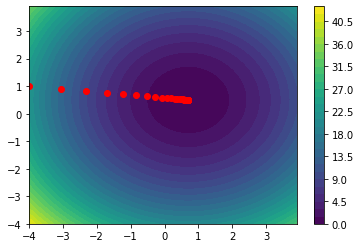

In [4]:
xArray = gradientDescent(np.array([np.random.randint(-4, 4), np.random.randint(-4, 4)]), fdx, 0.1, 100, 0.001)
plot_contour(f, xArray)

> 2) Escoja un $\alpha$ relativamente grande respecto al valor seleccionado ¿Qué sucede? ¿Permite un $\alpha$ muy grande la convergencia? 



Iteration: 99 x: [1. 3.] converge:False


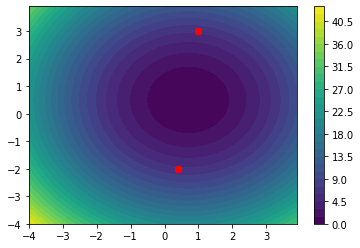

In [5]:
xArray = gradientDescent(np.array([np.random.randint(-4, 4), np.random.randint(-4, 4)]), fdx, 1, 100, 0.001)
plot_contour(f, xArray)

>>A. ¿Qué sucede si escoge un muy pequeño?

Iteration: 99 x: [2.58270365 0.0907166 ] converge:False


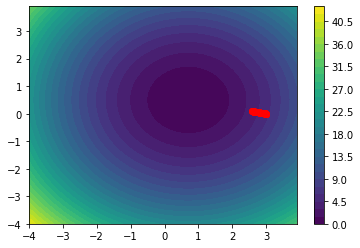

In [6]:
xArray = gradientDescent(np.array([np.random.randint(-4, 4), np.random.randint(-4, 4)]), fdx, 0.001, 100, 0.001)
plot_contour(f, xArray)

>c) (40 puntos) Implemente el algoritmo de Newton-Raphson, para
cada función:
>> 1) Reporte los resultados para 10 corridas

>>> A. la cantidad de iteraciones necesarias para converger

>>> B. el punto de convergencia.

>>> C. Reporte si convergió al punto correcto.

In [7]:

def delta(x, H, gradient):
  Hinv = np.linalg.inv(H) 
  return -(np.dot(Hinv, gradient(x[0], x[1])))

def fdx(x1, x2):
  return np.array([2 * (x1 - 0.7), 2 * (x2 - 0.5)])

def newtonRaphson(x, fdx, H, iterations, tolerance):

  xArray = np.array([x])
  convergence = False

  for i in range(iterations):
 
    x = x + delta(x, H, fdx)
    gradient = fdx(x[0], x[1])
    xArray = np.concatenate((xArray, np.array([x])))

    if l2(gradient) <= tolerance:
      iterations = i
      convergence = True
      break

  print("Iteration: {} x: {} converge:{}".format(i, x, convergence))
  
  return xArray

x = np.array([1.5, 3.0])
H = np.array([[2.0 ,0.0 ],[0.0, 2.0]]) 


def runNR(runs, fdx, H, iterations, tolerance):
  for i in range(runs):
    print("Run: {}".format(i), end = " ")
    x = np.array([np.random.randint(-4, 4), np.random.randint(-4, 4)])
    newtonRaphson(x, fdx, H, iterations, tolerance)

runNR(10, fdx, H, 50, 0.0001)


Run: 0 Iteration: 0 x: [0.7 0.5] converge:True
Run: 1 Iteration: 0 x: [0.7 0.5] converge:True
Run: 2 Iteration: 0 x: [0.7 0.5] converge:True
Run: 3 Iteration: 0 x: [0.7 0.5] converge:True
Run: 4 Iteration: 0 x: [0.7 0.5] converge:True
Run: 5 Iteration: 0 x: [0.7 0.5] converge:True
Run: 6 Iteration: 0 x: [0.7 0.5] converge:True
Run: 7 Iteration: 0 x: [0.7 0.5] converge:True
Run: 8 Iteration: 0 x: [0.7 0.5] converge:True
Run: 9 Iteration: 0 x: [0.7 0.5] converge:True


>>> D. Escoga una de las corridas y en una gráfica muestre los puntos
probados por el algoritmo.

Iteration: 0 x: [0.7 0.5] converge:True


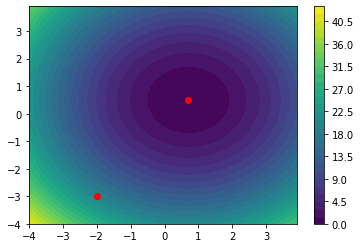

In [8]:
xArray = newtonRaphson(np.array([np.random.randint(-4, 4), np.random.randint(-4, 4)]), fdx, H, 100, 0.001)
plot_contour(f, xArray)